# For a set of csv files, read them in one at a time, perform Guassian Mixture Model 

In [1]:
from sklearn import mixture
from sklearn.preprocessing import scale, robust_scale
from sklearn import decomposition, metrics

import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Example from http://stackoverflow.com/questions/28438855/mixture-of-gaussians-using-scikit-learn-mixture
'''
os.chdir(os.path.expanduser("~/gmtest"))
data = np.loadtxt(open('foo.csv',"rb"),delimiter=",",skiprows=0)
gmm = mixture.GMM( n_components=14,n_iter=5000, covariance_type='full')
gmm.fit(data)

classes = gmm.predict(data)
pyplot.scatter(data[:,0], data[:,1], c=classes)
pyplot.show()
'''

'\nos.chdir(os.path.expanduser("~/gmtest"))\ndata = np.loadtxt(open(\'foo.csv\',"rb"),delimiter=",",skiprows=0)\ngmm = mixture.GMM( n_components=14,n_iter=5000, covariance_type=\'full\')\ngmm.fit(data)\n\nclasses = gmm.predict(data)\npyplot.scatter(data[:,0], data[:,1], c=classes)\npyplot.show()\n'

In [4]:
directory = '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/'
#directory = '/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/screen_357_cell_plate_1_labeled_merged_csvs/'
df = []
#for filename in glob.glob(directory + "LABELLED*.csv"): # reads through all files in this directory looking for *.csv and ignores sub-directories
for filename in glob.glob(directory + "LABELLED*c03.csv"): # reads through all files in this directory looking for *.csv and ignores sub-directories
    print("Read in" + filename)


Read in/Users/tswenson/Documents/Joels/Health_Data_Science/COMPANY_consulting_project/datasets/merged_csvs/LABELLED_by_cell_type_screen_525_cell_plate_1_well_c03.csv


In [5]:
my_data=pd.read_csv(filename, index_col=0)
my_data_headers = list(my_data)
meta_headers = ["Width","cell_label","cell_plate","lineage","screen","well","Time"]
my_data_data_headers = [x for x in my_data_headers if not x in meta_headers]
# Scale the data columns
my_scaled_data = scale(my_data[my_data_data_headers])
# Make a list where cell_label is converted to numbers for plotting
word_as_num=[]
for word in my_data['cell_label']:
    if word == "unlabelled":
        word_as_num.append("0")
    if word == "blast":
        word_as_num.append("0.5")
    if word == "healthy":
        word_as_num.append("1")


In [6]:
gmm = mixture.GaussianMixture( n_components=3, covariance_type='spherical') # 'full', 'tied', 'diag', 'spherical' 
gmm.fit(my_scaled_data)

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=3, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

In [7]:
classes = gmm.predict(my_scaled_data)

In [8]:
unique_labels = np.unique(classes)

In [9]:
#pyplot.scatter(my_scaled_data[:,0], my_scaled_data[:,1], c=classes)
#pyplot.show()

In [10]:
gmm_out = [] # This will be a list of lists where the 1st entry is the cluster ID, 2nd: is
## how many "unlabelled" are in that cluster, 3rd: number of blast, 4th: number of healthy.
for i in xrange(len(unique_labels)):
    clst_index = my_data['cell_label'][np.where(classes==unique_labels[i])[0]]
    if clst_index.empty == True:
        print("Cluster index and original data don't line up right. STOP AND FIX")
        break
    gmm_out.append([unique_labels[i],sum(clst_index=='unlabelled'),
                     sum(clst_index=='blast'),sum(clst_index=='healthy')])
    #print(str(unique_labels2[i])+"--") # prints cluster name plus two "--"s
    #print len(tsne_out_mink2[np.where(labels2==unique_labels2[i])[0],0]) # prints how many cells are in that cluster
print(gmm_out)

[[0, 3600, 0, 0], [1, 4174, 171, 467], [2, 625, 18, 26]]


## Do another round of GMM

In [11]:
# Convert transformed data into a pandas dataframe
my_scaled_data_pd = pd.DataFrame(my_scaled_data)

In [12]:
my_data_scaled_GMM_clstr3 = my_scaled_data_pd.iloc[np.where(classes==unique_labels[1])[0]]
my_data_scaled_GMM_clstr3_labels = my_data['cell_label'][np.where(classes==unique_labels[1])[0]]

# Need to re-index the pandas dataframe

In [13]:
my_data_scaled_GMM_clstr3 = my_data_scaled_GMM_clstr3.reset_index(drop=True)
my_data_scaled_GMM_clstr3_labels = my_data_scaled_GMM_clstr3_labels.reset_index(drop=True)

In [14]:
#print(my_data_scaled_GMM_clstr10)

In [15]:
#my_data_scaled_GMM_clstr10.shape

In [16]:
gmm1 = mixture.GaussianMixture( n_components=7, covariance_type='diag',) #'full', 'tied', 'diag', 'spherical'
gmm1.fit(my_data_scaled_GMM_clstr3)
classes1 = gmm1.predict(my_data_scaled_GMM_clstr3)
unique_labels1 = np.unique(classes1)

In [17]:
gmm_out1 = [] # This will be a list of lists where the 1st entry is the cluster ID, 2nd: is
## how many "unlabelled" are in that cluster, 3rd: number of blast, 4th: number of healthy.
for i in xrange(len(unique_labels1)):
    clst_index1 = my_data_scaled_GMM_clstr3_labels[np.where(classes1==unique_labels1[i])[0]]
    #clst_index1 = my_data['cell_label'][np.where(classes1==unique_labels1[i])[0]]
    if clst_index1.isnull().sum() > 0:
        print("Dangit, the indexing is screwed up")
        break
    #print(clst_index1.shape)
    #clst_index = my_data_scaled_PCA_DBSCAN0_labels[np.where(labels==unique_labels[i])[0]]
    if clst_index1.empty == True:
        print("Cluster index and original data don't line up right. STOP AND FIX")
        break
    gmm_out1.append([unique_labels1[i],sum(clst_index1=='unlabelled'),
                     sum(clst_index1=='blast'),sum(clst_index1=='healthy')])
    #print(str(unique_labels2[i])+"--") # prints cluster name plus two "--"s
    #print len(tsne_out_mink2[np.where(labels2==unique_labels2[i])[0],0]) # prints how many cells are in that cluster
print(gmm_out1)

[[0, 284, 0, 3], [1, 613, 0, 0], [2, 1124, 0, 0], [3, 478, 0, 236], [4, 330, 12, 82], [5, 1043, 0, 146], [6, 302, 159, 0]]


In [18]:
# Sanity check is below which should be formalized as a test.

# The output for each cluster from this should block should add up to the cluster it was originally pulled from, so
## sum up element 1, 2 and 3 and make sure that is the same as the cluster you subsetted from

# Note that I need to re-do the indexing if I want to output any of these clusters

# Perform PCA (getting rid of outliers) and then do Guassian mixture modelling

In [19]:
#my_scaled_data = robust_scale(my_data[my_data_data_headers])
my_scaled_data = scale(my_data[my_data_data_headers])

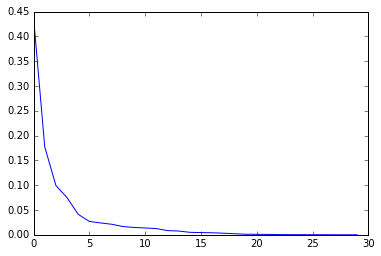

In [20]:
# Perform PCA
pca = decomposition.PCA()
pca.fit(my_scaled_data)
var=pca.explained_variance_ratio_
plt.plot(var)

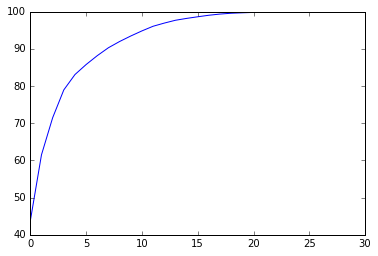

In [21]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [22]:
#### Based on the above transform the data
pca = decomposition.PCA(n_components = 10)
my_scaled_data_transformed = pca.fit_transform(my_scaled_data)

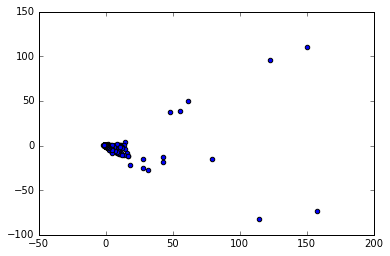

In [23]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(my_scaled_data_transformed[:,[0]],my_scaled_data_transformed[:,[1]])
#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.xlim(0,20)
plt.show()
#plt.xscale("log")
#plt.yscale("log")
#plt.scatter(my_scaled_data_transformed[:,[0]],my_scaled_data_transformed[:,[1]])

### Get rid of outliers during the fit step of PCA, then transform on all data point

In [24]:
(my_scaled_data_transformed[:,[0]]>20).sum()

13

In [26]:
## Subset the data
no_outliers_index = (my_scaled_data_transformed[:,[0]]<20).flatten()
#my_scaled_data_transformed[no_outliers_index,0]
my_scaled_data_subset1 = my_scaled_data[no_outliers_index]

In [27]:
print(my_scaled_data.shape)
print(my_scaled_data_subset1.shape)
print(no_outliers_index.sum())
print(len(no_outliers_index))


(9081, 30)
(9068, 30)
9068
9081


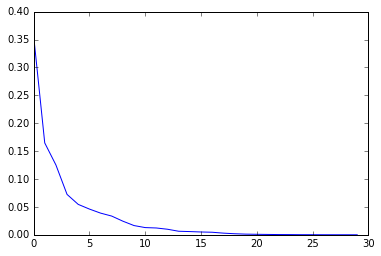

In [28]:
# Perform PCA
pca = decomposition.PCA()
pca.fit(my_scaled_data_subset1)
var=pca.explained_variance_ratio_
plt.plot(var)

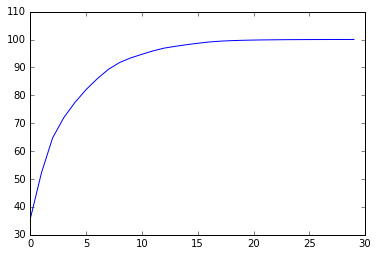

In [29]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [30]:
#### Based on the above transform the data
pca = decomposition.PCA(n_components = 5)
my_scaled_data_transformed = pca.fit(my_scaled_data_subset1).transform(my_scaled_data_subset1)

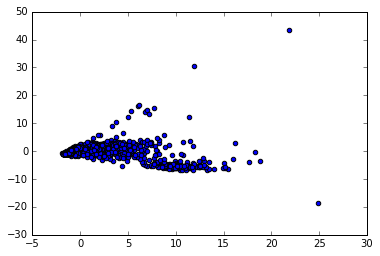

In [31]:
plt.scatter(my_scaled_data_transformed[:,[0]],my_scaled_data_transformed[:,[1]])

In [36]:
#no_outliers_index = (my_scaled_data_transformed[:,[0]]<20).flatten()
no_outliers1_index = ((my_scaled_data_transformed[:,[1]]<5).flatten()&(my_scaled_data_transformed[:,[1]]>-10).flatten())
my_scaled_data_transformed[no_outliers1_index].shape

(9049, 5)

### Subset the outliers again 

In [38]:
## Subset the data again
my_scaled_data_subset2 = my_scaled_data_subset1[no_outliers1_index]
my_scaled_data_subset2.shape

(9049, 30)

### Do PCA again 

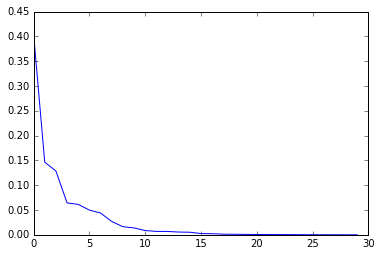

In [39]:
# Perform PCA
pca = decomposition.PCA()
pca.fit(my_scaled_data_subset2)
var=pca.explained_variance_ratio_
plt.plot(var)

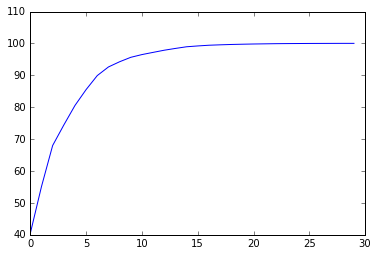

In [40]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

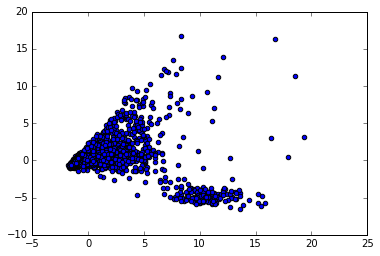

In [45]:
#### Based on the above transform the data
pca = decomposition.PCA(n_components = 5)
my_scaled_data_transformed2 = pca.fit(my_scaled_data_subset2).transform(my_scaled_data_subset2)
plt.scatter(my_scaled_data_transformed2[:,[0]],my_scaled_data_transformed2[:,[1]])

### Apply the fit to transform the entire dataset

In [50]:
word_as_num=[]
for word in my_data['cell_label']:
    if word == "unlabelled":
        word_as_num.append("0")
    if word == "blast":
        word_as_num.append("0.5")
    if word == "healthy":
        word_as_num.append("1")

(-10, 20)

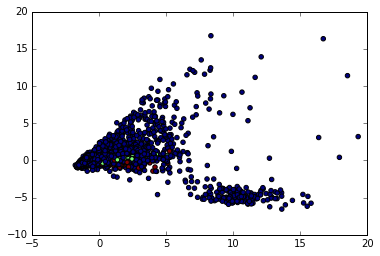

In [51]:
my_scaled_data_transformed = None;
pca = decomposition.PCA(n_components = 5)
my_scaled_data_transformed = pca.fit(my_scaled_data_subset2).transform(my_scaled_data)
plt.scatter(my_scaled_data_transformed[:,[0]],my_scaled_data_transformed[:,[1]],c=word_as_num)
plt.xlim(-5,20)
plt.ylim(-10,20)

In [64]:
my_scaled_data_transformed.shape

(9081, 5)

# Do GMM 

In [81]:
gmm = mixture.GaussianMixture( n_components=2, covariance_type='full') #'full', 'tied', 'diag', 'spherical'
gmm.fit(my_scaled_data_transformed)
classes = gmm.predict(my_scaled_data_transformed)

In [82]:
unique_labels = np.unique(classes)

In [83]:
#pyplot.scatter(my_scaled_data_transformed[:,0], my_scaled_data_transformed[:,1], c=classes)
#pyplot.show()

In [84]:
gmm_out = [] # This will be a list of lists where the 1st entry is the cluster ID, 2nd: is
## how many "unlabelled" are in that cluster, 3rd: number of blast, 4th: number of healthy.
for i in xrange(len(unique_labels)):
    clst_index = my_data['cell_label'][np.where(classes==unique_labels[i])[0]]
    if clst_index.empty == True:
        print("Cluster index and original data don't line up right. STOP AND FIX")
        break
    gmm_out.append([unique_labels[i],sum(clst_index=='unlabelled'),
                     sum(clst_index=='blast'),sum(clst_index=='healthy')])
    #print(str(unique_labels2[i])+"--") # prints cluster name plus two "--"s
    #print len(tsne_out_mink2[np.where(labels2==unique_labels2[i])[0],0]) # prints how many cells are in that cluster
print(gmm_out)

[[0, 7413, 118, 419], [1, 986, 71, 74]]


## Do another round of GMM

In [86]:
# Convert transformed data into a pandas dataframe
my_scaled_data_transformed_pd = pd.DataFrame(my_scaled_data_transformed)

In [87]:
my_data_scaled_GMM_clstr10 = my_scaled_data_transformed_pd.iloc[np.where(classes==unique_labels[0])[0]]
my_data_scaled_GMM_clstr10_labels = my_data['cell_label'][np.where(classes==unique_labels[0])[0]]

# Need to re-index the pandas dataframe

In [88]:
my_data_scaled_GMM_clstr10 = my_data_scaled_GMM_clstr10.reset_index(drop=True)
my_data_scaled_GMM_clstr10_labels = my_data_scaled_GMM_clstr10_labels.reset_index(drop=True)

In [89]:
#print(my_data_scaled_GMM_clstr10)

In [90]:
#my_data_scaled_GMM_clstr10.shape

In [93]:
gmm1 = mixture.GaussianMixture( n_components=5, covariance_type='full') #'full', 'tied', 'diag', 'spherical'
gmm1.fit(my_data_scaled_GMM_clstr10)
classes1 = gmm1.predict(my_data_scaled_GMM_clstr10)
unique_labels1 = np.unique(classes1)

In [94]:
gmm_out1 = [] # This will be a list of lists where the 1st entry is the cluster ID, 2nd: is
## how many "unlabelled" are in that cluster, 3rd: number of blast, 4th: number of healthy.
for i in xrange(len(unique_labels1)):
    clst_index1 = my_data_scaled_GMM_clstr10_labels[np.where(classes1==unique_labels1[i])[0]]
    #clst_index1 = my_data['cell_label'][np.where(classes1==unique_labels1[i])[0]]
    if clst_index1.isnull().sum() > 0:
        print("Dangit, the indexing is screwed up")
        break
    #print(clst_index1.shape)
    #clst_index = my_data_scaled_PCA_DBSCAN0_labels[np.where(labels==unique_labels[i])[0]]
    if clst_index1.empty == True:
        print("Cluster index and original data don't line up right. STOP AND FIX")
        break
    gmm_out1.append([unique_labels1[i],sum(clst_index1=='unlabelled'),
                     sum(clst_index1=='blast'),sum(clst_index1=='healthy')])
    #print(str(unique_labels2[i])+"--") # prints cluster name plus two "--"s
    #print len(tsne_out_mink2[np.where(labels2==unique_labels2[i])[0],0]) # prints how many cells are in that cluster
print(gmm_out1)

[[0, 1041, 1, 0], [1, 2618, 0, 0], [2, 778, 91, 219], [3, 569, 0, 0], [4, 2407, 26, 200]]


In [95]:
# Sanity check is below which should be formalized as a test.

# The output for each cluster from this should block should add up to the cluster it was originally pulled from, so
## sum up element 1, 2 and 3 and make sure that is the same as the cluster you subsetted from

# Note that I need to re-do the indexing if I want to output any of these clusters